In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Reading Data from Training Set

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Removing uneccessory data like Name, TicketID, Fare and Cabin

In [3]:
train = train.drop(columns=['Name','Ticket','Fare','Cabin'],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


# Getting the number of missing values in each columns.

In [4]:
missing = (train.isnull().sum())
print(missing[missing>0],train.count())

Age         177
Embarked      2
dtype: int64 PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Embarked       889
dtype: int64


# Converting Age into a multiple of 5 for better calculations

In [5]:
train.Age=train.Age-train.Age%5
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,20.0,1,0,S
1,2,1,1,female,35.0,1,0,C
2,3,1,3,female,25.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


# Seperating Feature and Target

In [6]:
Train_y = train.Survived
Train_X = train.drop(['Survived'], axis=1)


# Filling empty age with mean value

In [7]:
Train_X.Age = Train_X.Age.fillna(Train_X.Age.mean())
print(Train_X.Age)

0      20.000000
1      35.000000
2      25.000000
3      35.000000
4      35.000000
         ...    
886    25.000000
887    15.000000
888    27.682073
889    25.000000
890    30.000000
Name: Age, Length: 891, dtype: float64


# Looking into how Features are affecting the target

<AxesSubplot:xlabel='Age', ylabel='count'>

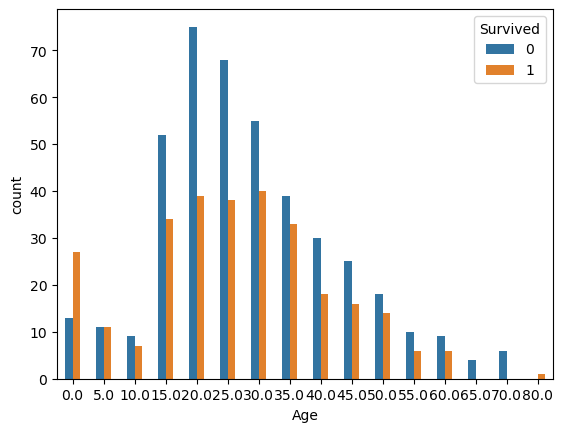

In [8]:
import seaborn as sns

sns.countplot(data=train, x='Age', hue='Survived', width=0.5)

<AxesSubplot:xlabel='Sex', ylabel='count'>

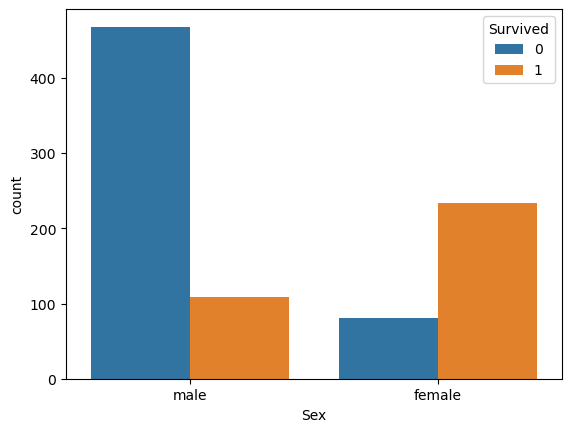

In [9]:
sns.countplot(data=train, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

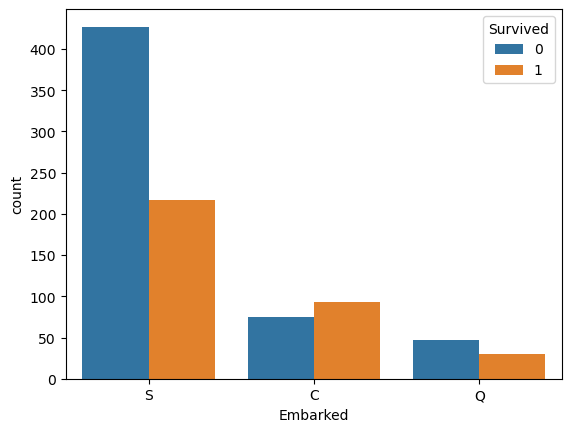

In [10]:
sns.countplot(data=train, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

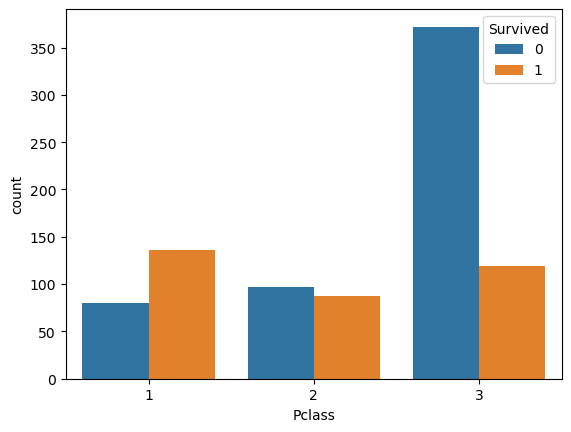

In [11]:
sns.countplot(data=train, x='Pclass', hue='Survived')

In [12]:
Train_y.head()
Train_X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,male,20.0,1,0,S
1,2,1,female,35.0,1,0,C
2,3,3,female,25.0,0,0,S
3,4,1,female,35.0,1,0,S
4,5,3,male,35.0,0,0,S


In [13]:
Train_X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,male,20.000000,1,0,S
1,2,1,female,35.000000,1,0,C
2,3,3,female,25.000000,0,0,S
3,4,1,female,35.000000,1,0,S
4,5,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,887,2,male,25.000000,0,0,S
887,888,1,female,15.000000,0,0,S
888,889,3,female,27.682073,1,2,S
889,890,1,male,25.000000,0,0,C


# Reading Test Data

In [14]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Dropping unnecessory columns

In [15]:
test = test.drop(columns=['Name','Ticket','Fare','Cabin'],axis=1)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,S
414,1306,1,female,39.0,0,0,C
415,1307,3,male,38.5,0,0,S
416,1308,3,male,NaN,0,0,S


# Filling Age of test data with mean

In [16]:
test.Age = test.Age.fillna(test.Age.mean())
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.50000,0,0,Q
1,893,3,female,47.00000,1,0,S
2,894,2,male,62.00000,0,0,Q
3,895,3,male,27.00000,0,0,S
4,896,3,female,22.00000,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,S
414,1306,1,female,39.00000,0,0,C
415,1307,3,male,38.50000,0,0,S
416,1308,3,male,30.27259,0,0,S


# Converting Age into multiples of 5 for better calculations

In [17]:
test.Age = test.Age-test.Age%5
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,30.0,0,0,Q
1,893,3,female,45.0,1,0,S
2,894,2,male,60.0,0,0,Q
3,895,3,male,25.0,0,0,S
4,896,3,female,20.0,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,male,30.0,0,0,S
414,1306,1,female,35.0,0,0,C
415,1307,3,male,35.0,0,0,S
416,1308,3,male,30.0,0,0,S


# Encoding Gender

In [18]:
Train_X.Sex=Train_X.Sex.replace({'male':1,'female':0})
Train_X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1,20.000000,1,0,S
1,2,1,0,35.000000,1,0,C
2,3,3,0,25.000000,0,0,S
3,4,1,0,35.000000,1,0,S
4,5,3,1,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,887,2,1,25.000000,0,0,S
887,888,1,0,15.000000,0,0,S
888,889,3,0,27.682073,1,2,S
889,890,1,1,25.000000,0,0,C


In [19]:
test.Sex=test.Sex.replace({'male':1,'female':0})
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,30.0,0,0,Q
1,893,3,0,45.0,1,0,S
2,894,2,1,60.0,0,0,Q
3,895,3,1,25.0,0,0,S
4,896,3,0,20.0,1,1,S
...,...,...,...,...,...,...,...
413,1305,3,1,30.0,0,0,S
414,1306,1,0,35.0,0,0,C
415,1307,3,1,35.0,0,0,S
416,1308,3,1,30.0,0,0,S


# Encoding Embarked

In [20]:
Train_X.Embarked=Train_X.Embarked.replace({'S':0,'C':1,'Q':2})
Train_X.Embarked = Train_X.Embarked.fillna(0)
Train_X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1,20.000000,1,0,0.0
1,2,1,0,35.000000,1,0,1.0
2,3,3,0,25.000000,0,0,0.0
3,4,1,0,35.000000,1,0,0.0
4,5,3,1,35.000000,0,0,0.0
...,...,...,...,...,...,...,...
886,887,2,1,25.000000,0,0,0.0
887,888,1,0,15.000000,0,0,0.0
888,889,3,0,27.682073,1,2,0.0
889,890,1,1,25.000000,0,0,1.0


In [21]:
test.Embarked=test.Embarked.replace({'S':0,'C':1,'Q':2})
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,30.0,0,0,2
1,893,3,0,45.0,1,0,0
2,894,2,1,60.0,0,0,2
3,895,3,1,25.0,0,0,0
4,896,3,0,20.0,1,1,0
...,...,...,...,...,...,...,...
413,1305,3,1,30.0,0,0,0
414,1306,1,0,35.0,0,0,1
415,1307,3,1,35.0,0,0,0
416,1308,3,1,30.0,0,0,0


In [22]:
Train_X['Family'] = Train_X.SibSp + Train_X.Parch
Train_X = Train_X.drop(['SibSp','Parch'],axis=1)
Train_X

,PassengerId,Pclass,Sex,Age,Embarked,Family
0,1,3,1,20.000000,0.0,1
1,2,1,0,35.000000,1.0,1
2,3,3,0,25.000000,0.0,0
3,4,1,0,35.000000,0.0,1
4,5,3,1,35.000000,0.0,0
...,...,...,...,...,...,...
886,887,2,1,25.000000,0.0,0
887,888,1,0,15.000000,0.0,0
888,889,3,0,27.682073,0.0,3
889,890,1,1,25.000000,1.0,0


In [23]:
test['Family'] = test.SibSp + test.Parch
test = test.drop(['SibSp','Parch'],axis=1)
test

,PassengerId,Pclass,Sex,Age,Embarked,Family
0,892,3,1,30.0,2,0
1,893,3,0,45.0,0,1
2,894,2,1,60.0,2,0
3,895,3,1,25.0,0,0
4,896,3,0,20.0,0,2
...,...,...,...,...,...,...
413,1305,3,1,30.0,0,0
414,1306,1,0,35.0,1,0
415,1307,3,1,35.0,0,0
416,1308,3,1,30.0,0,0


# Creating model with Random Forest Classifier

<AxesSubplot:xlabel='Survived', ylabel='count'>

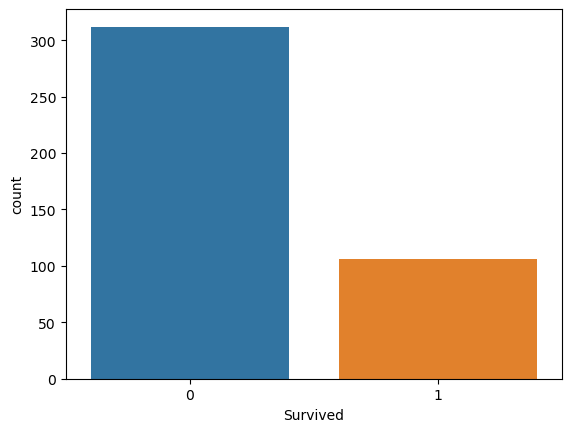

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, random_state=0, max_depth=5)
model.fit(Train_X, Train_y)
preds = model.predict(test)
predictions = pd.DataFrame(data={"PassengerId":test["PassengerId"],"Survived":preds})
sns.countplot(data=predictions,x='Survived')

# Saving output data

In [25]:
predictions.to_csv('/kaggle/working/output.csv',header=True)